In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test_1.csv')

print(f"Train samples: {len(train_data):,}")
print(f"Test samples: {len(test_data):,}")
print(f"Train columns: {list(train_data.columns)}")
print(f"Test columns: {list(test_data.columns)}")

labels = list(train_data.columns)
y_labels = labels[2:]

Train samples: 159,571
Test samples: 63,978
Train columns: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
Test columns: ['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [3]:
# missing values
print("Train data:")
print(train_data.isnull().sum())
print("Test data:")
print(test_data.isnull().sum())

Train data:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64
Test data:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [4]:
# example comments
print("Non-toxic comment:")
non_toxic = train_data[train_data['toxic']==0].iloc[0]
print(f"{non_toxic['comment_text']}")
print()
print("Toxic comment:")
toxic = train_data[train_data['toxic']==1].iloc[0]
print(f"Labels: {', '.join([col for col in labels if toxic[col] == 1])}")
print(f"{toxic['comment_text']}")


Non-toxic comment:
Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27

Toxic comment:
Labels: toxic, severe_toxic, obscene, insult
COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK


Percentage of comments with n labels:
0 labels: 143346 (89.83%)
1 labels:   6360 ( 3.99%)
2 labels:   3480 ( 2.18%)
3 labels:   4209 ( 2.64%)
4 labels:   1760 ( 1.10%)
5 labels:    385 ( 0.24%)
6 labels:     31 ( 0.02%)

Percentage of positive samples per label:
toxic         :  15294 (9.58%)
severe_toxic  :   1595 (1.00%)
obscene       :   8449 (5.29%)
threat        :    478 (0.30%)
insult        :   7877 (4.94%)
identity_hate :   1405 (0.88%)


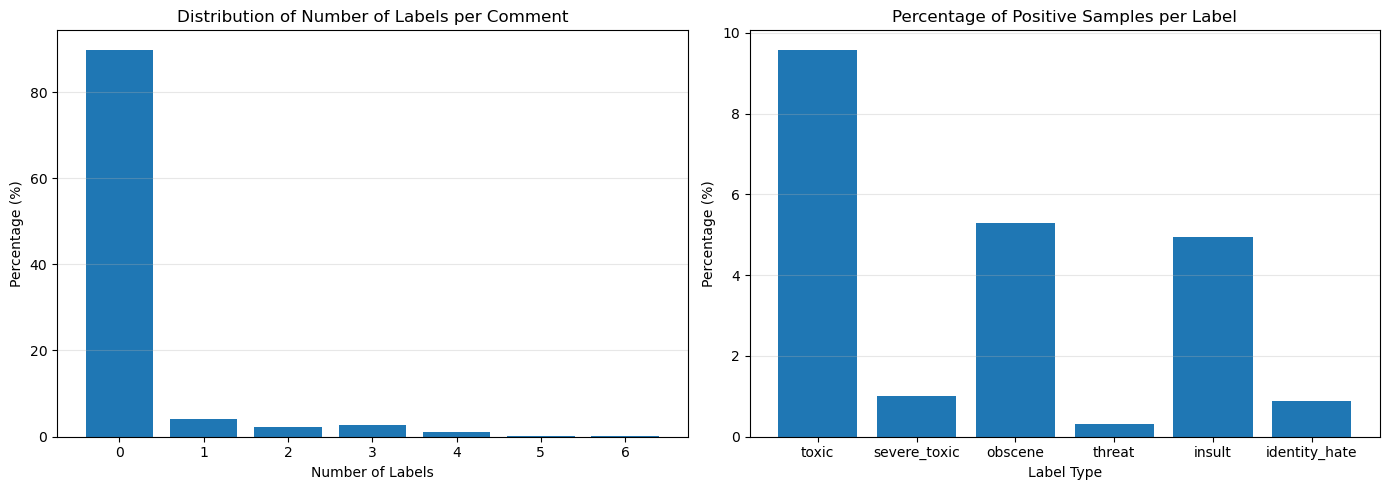

In [5]:
# number of comments with n labels
print(f"Percentage of comments with n labels:")
train_data['num_labels'] = train_data[y_labels].sum(axis=1)
num_labels_dist = {}
for i in range(7):
    count = (train_data['num_labels'] == i).sum()
    pct = (count / len(train_data)) * 100
    num_labels_dist[i] = pct
    print(f"{i} labels: {count:6d} ({pct:5.2f}%)")

# number of samples per label
print("\nPercentage of positive samples per label:")
label_counts = {}
for col in y_labels:
    count = train_data[col].sum()
    pct = (count / len(train_data)) * 100
    label_counts[col] = pct
    print(f"{col:14s}: {count:6d} ({pct:.2f}%)")

# bar plot visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(num_labels_dist.keys(), num_labels_dist.values())
ax1.set_title('Distribution of Number of Labels per Comment')
ax1.set_xlabel('Number of Labels')
ax1.set_ylabel('Percentage (%)')
ax1.set_xticks(range(7))
ax1.grid(axis='y', alpha=0.3)

ax2.bar(label_counts.keys(), label_counts.values())
ax2.set_title('Percentage of Positive Samples per Label')
ax2.set_xlabel('Label Type')
ax2.set_ylabel('Percentage (%)')
ax2.tick_params(axis='x')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Word count:
count    159571.000000
mean         67.273527
std          99.230702
min           1.000000
25%          17.000000
50%          36.000000
75%          75.000000
max        1411.000000
Name: word_count, dtype: float64

Avg length of toxic comments: 51.3
Avg length of non-toxic comments: 69.0


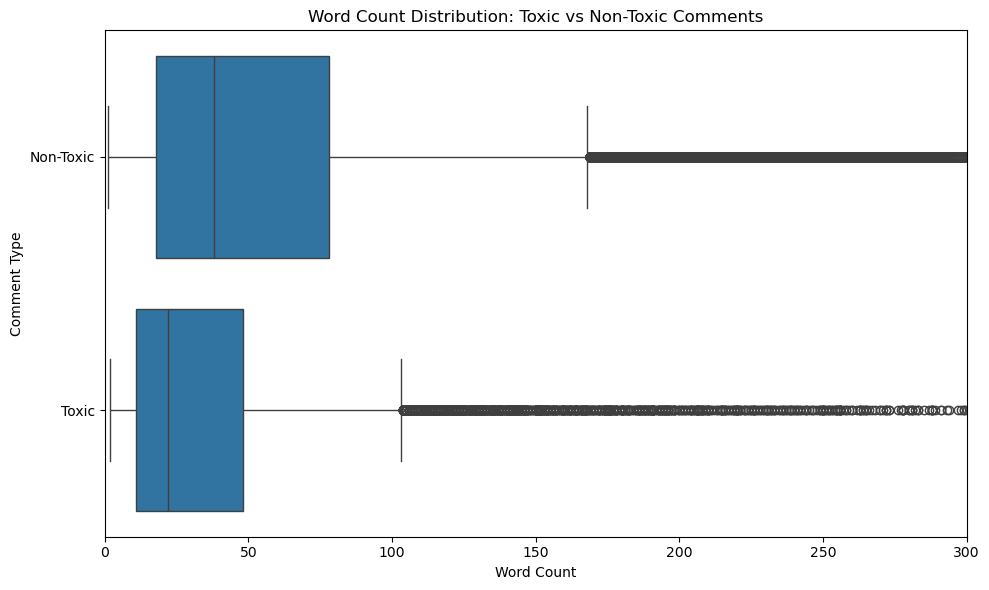

In [23]:
# text length 
train_data['word_count'] = train_data['comment_text'].str.split().str.len()

print("Word count:")
print(train_data['word_count'].describe())
print()
print(f"Avg length of toxic comments: {train_data[train_data['toxic']==1]['word_count'].mean():.1f}")
print(f"Avg length of non-toxic comments: {train_data[train_data['toxic']==0]['word_count'].mean():.1f}")

# box plot visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, y='toxic', x='word_count', orient='h')
plt.title('Word Count Distribution: Toxic vs Non-Toxic Comments')
plt.xlabel('Word Count')
plt.xlim(0, 300)
plt.ylabel('Comment Type')
plt.yticks([0, 1], ['Non-Toxic', 'Toxic'])
plt.tight_layout()
plt.show()


               toxic  severe_toxic  obscene  threat  insult  identity_hate
toxic          1.000         0.309    0.677   0.157   0.648          0.266
severe_toxic   0.309         1.000    0.403   0.124   0.376          0.202
obscene        0.677         0.403    1.000   0.141   0.741          0.287
threat         0.157         0.124    0.141   1.000   0.150          0.115
insult         0.648         0.376    0.741   0.150   1.000          0.338
identity_hate  0.266         0.202    0.287   0.115   0.338          1.000


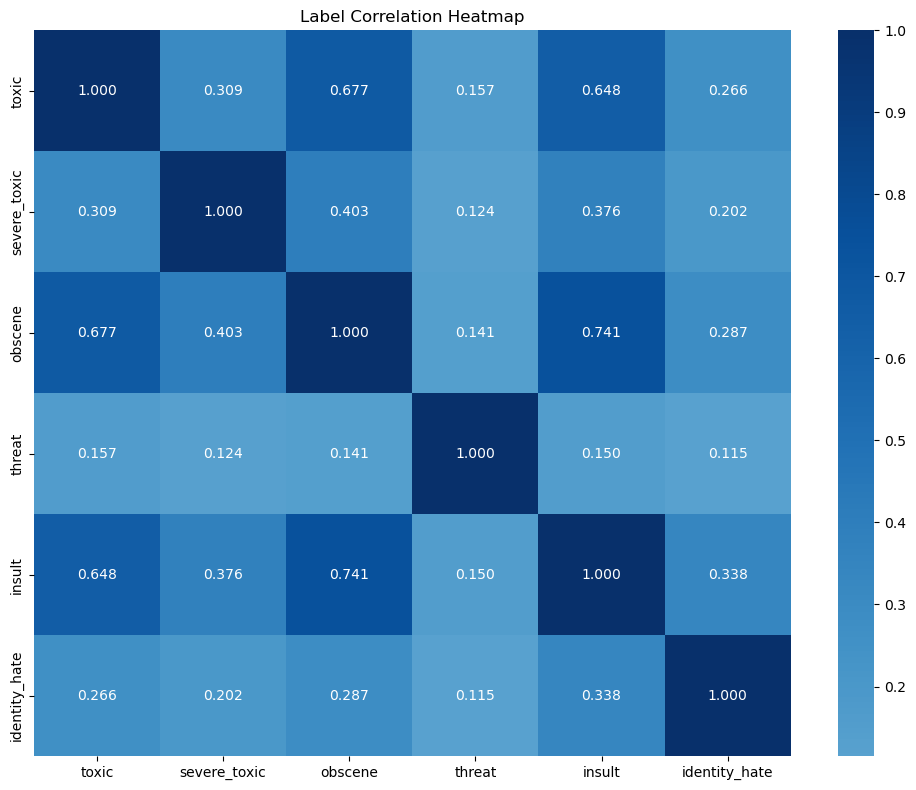

In [ ]:
# label correlation
correlation = train_data[y_labels].corr()
print(correlation.round(3))

# heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.3f', cmap='Blues', center=0)
plt.title('Label Correlation Heatmap')
plt.tight_layout()
plt.show()
